# <p style="text-align: center;">EDA FOR COUNTRIES OF THE WORLD</p>


In [1]:
!pip install plotly.express

     |████████████████████████████████| 13.1MB 6.7MB/s eta 0:00:01
  Found existing installation: plotly 3.6.1
    Uninstalling plotly-3.6.1:
      Successfully uninstalled plotly-3.6.1


In [2]:
!pip install geopandas

     |████████████████████████████████| 972kB 7.0MB/s eta 0:00:01
     |████████████████████████████████| 10.9MB 7.4MB/s eta 0:00:01
     |████████████████████████████████| 14.8MB 12.2MB/s eta 0:00:01
     |████████████████████████████████| 1.0MB 56.7MB/s eta 0:00:01


In [3]:
from IPython.display import HTML
from IPython.display import Image
Image(url= "https://www.worldatlas.com/r/w728-h425-c728x425/upload/0f/59/b2/untitled-design-275.jpg")

# <p style="text-align: center;">ABSTRACT</p>
[Reference Link 1](#1)

Countries of the World is a dataset by Fernando Lasso, which has a list of various factors which affect the GDP per capita of the countries. In this Notebook, I have shown the factors which highly affect the GDP per capita and some factors which more or less do not affect the GDP per capita. I have also discussed about the GDP which is GDP per capita multiplied by the total population of the country. Linear Regression and Correlation are the Exploratory Data Analysis methods used to find the factors affecting the GDP.


In [8]:
from IPython.core.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [10]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

In [11]:
# read csv file
#df=pd.read_csv('../input/countries of the world.csv', decimal = ',')
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_49695b9fc9424a8fa0cbf5cfb0b0891e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='LEZw99I9fCsMWidt9fHCJXG_twBPYL-_4K36AAWo3LYg',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_49695b9fc9424a8fa0cbf5cfb0b0891e.get_object(Bucket='exploratorydataanalysiscountrieso-donotdelete-pr-9nw0cn5rl59jp5',Key='countries-of-the-world.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df=pd.read_csv(body)


### Dataset Overview
Here we are looking at the top 5 rows of the dataset to view, what type of dataset it is. We also look at the columns which show the various attributes in the dataset.

In [12]:
# View first 5 rows(default) to see the general distribution of data
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


# Business Understanding
We will choose what we want to do with the data. what insight do we want to get. from the data set, we want to know if there are a correlation between Population vs Area which impact the GDP of Countries.

In [13]:
#first, we select the data that we want to analyze 
df=df[['Country','Population','Area (sq. mi.)','GDP ($ per capita)']]
df

,Country,Population,Area (sq. mi.),GDP ($ per capita)
0,Afghanistan,31056997,647500,700.0
1,Albania,3581655,28748,4500.0
2,Algeria,32930091,2381740,6000.0
3,American Samoa,57794,199,8000.0
4,Andorra,71201,468,19000.0
5,Angola,12127071,1246700,1900.0
6,Anguilla,13477,102,8600.0
7,Antigua & Barbuda,69108,443,11000.0
8,Argentina,39921833,2766890,11200.0
9,Armenia,2976372,29800,3500.0


### Statistical Analysis
Here we are running basic Statistical analysis on the given data to find any abnormal values in the dataset

In [14]:
# run basic statistical analysis on the given data to find any abnormal values
df.info()
df.dtypes
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 4 columns):
Country               227 non-null object
Population            227 non-null int64
Area (sq. mi.)        227 non-null int64
GDP ($ per capita)    226 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 7.2+ KB


,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


### Checking for empty fields
[Reference Link 2](#2)

Next we will check if there are any missing or Null values in the dataset.

In [15]:
print("Are there Null Values in the dataset? ")
df.isnull().values.any()

Are there Null Values in the dataset? 


True

### Finding the location of Null values
[Reference Link 2](#2)

Now that we know that there are missing(null) values in the dataset, we need to find the columns which have missing values and then find the percentage of how much data is missing in those columns to get a better picture.

In [16]:
# finding the missing or null values in the data
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])

,Total Missing,Percent
GDP ($ per capita),1,0.44


In [17]:
mean=df['GDP ($ per capita)'].mean()
df['GDP ($ per capita)'].replace(np.nan,mean,inplace=True)

In [18]:
df

,Country,Population,Area (sq. mi.),GDP ($ per capita)
0,Afghanistan,31056997,647500,700.000000
1,Albania,3581655,28748,4500.000000
2,Algeria,32930091,2381740,6000.000000
3,American Samoa,57794,199,8000.000000
4,Andorra,71201,468,19000.000000
5,Angola,12127071,1246700,1900.000000
6,Anguilla,13477,102,8600.000000
7,Antigua & Barbuda,69108,443,11000.000000
8,Argentina,39921833,2766890,11200.000000
9,Armenia,2976372,29800,3500.000000


### How to find the missing values in the dataset?
[Reference Link 2](#2)

Now that we know that there are missing values in the dataset, we need a remedy to this. We could either ignore the missing values if the number of missing values is low, but in some cases like climate and literacy there are many missing values (about 10%) of the data,this could significantly affect the graph. So before we run our analysis, we need to figure out a way to replace these null values. Below we are plotting our dependant variable (GDP per capita) to find out its distribution. Based on this distribution, we will be able to decide how to replace our missing values.

### Replacing missing values in the dataset
[Reference Link 2](#2)

From the graphs plotted above, we can see that the GDP per capita is distributed in a skewed manner i.e. it starts with a high value and then exponentially drops to a low value. Since the distribution is skewed, it is advisable to replace the missing values with the central tendancy of median. We do not use mean or mode because mean is influenced by outliers while mode can have multiple values and mode is generally used for categorical data.

A region is an area of land that includes a number of places which have something in common. It is generally seen, that countries in the same region have the same climate, and thus agricultural patterns are similar. Other socio-cultural attributes such as literacy, industry etc are also found to be similar in a region.

Thus we are grouping our data by the region and calculating the median of the values of each attributes. Now these median values can be used to replace the missing values in our data set. Below I have shown the median values of GDP, Literacy % and Agriculture grouped by region.(I have randomly selected Literacy and Agriculture to show the grouping by region)

PS- Since climate is a categorical data, we are using mode instead of mean for climate.

In [19]:
print("Are there Null Values in the dataset? ")
df.isnull().values.any()

Are there Null Values in the dataset? 


False

In [20]:
print(df.isnull().sum())

Country               0
Population            0
Area (sq. mi.)        0
GDP ($ per capita)    0
dtype: int64


### No missing values
As we can see, that the missing values in the dataset are now gone, we can actually begin with our Exploratory data analysis. EDA is the process of figuring out what the data can tell us and we use EDA to find patterns, relationships, or anomalies to inform our subsequent analysis.

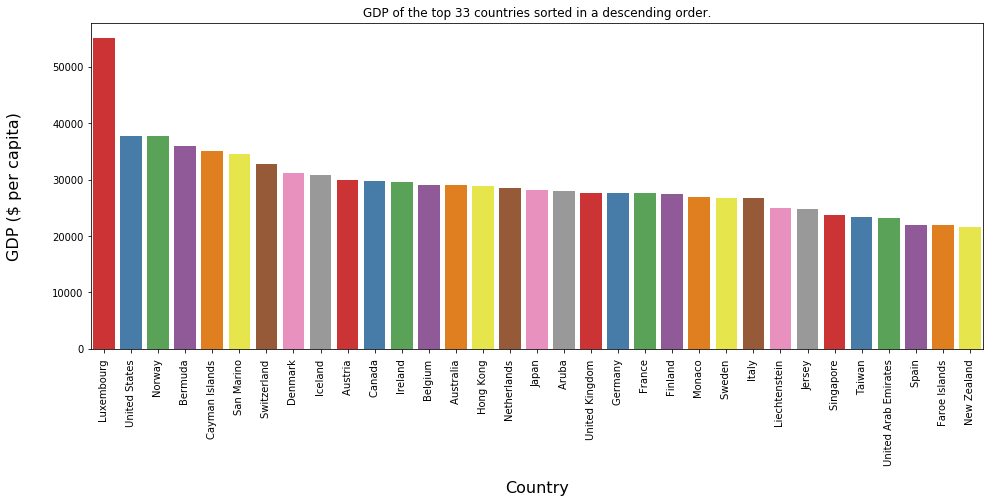

In [21]:
# sorting and plotting Countries based on GDP
top_gdp_countries = df.sort_values('GDP ($ per capita)',ascending=False)
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.head(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
ax.set_title('GDP of the top 33 countries sorted in a descending order.')
plt.xticks(rotation=90)
plt.show()

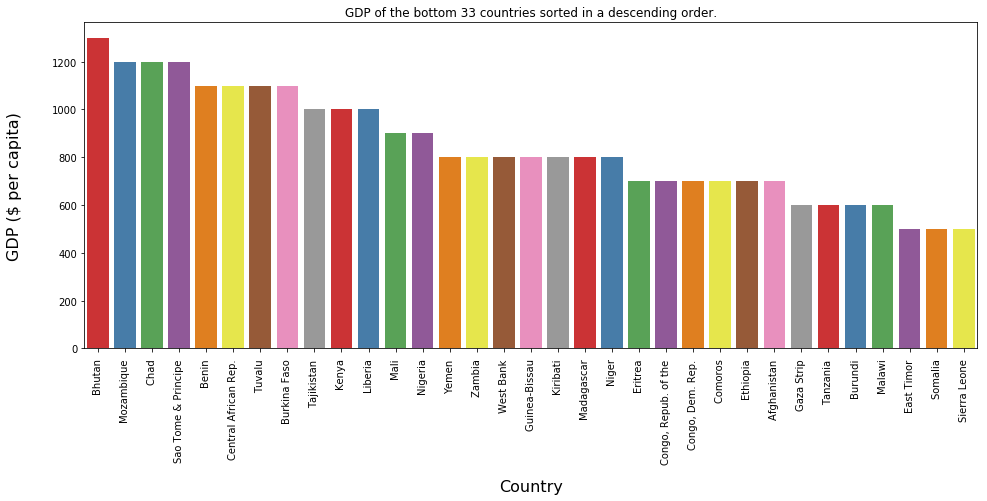

In [22]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.tail(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
ax.set_title('GDP of the bottom 33 countries sorted in a descending order.')
plt.xticks(rotation=90)
plt.show()

# <p style="text-align: center;"> Correlation<p>
[Reference Link 1](#1)
    
In the first step of our EDA we are finding out the correlation among the various attributes of the dataset. Correlation value gives us the measure of linear relationship amongst two numerical quantities. The range of correlation is between -1 and 1.

When two variables have a positive correlation, it means the variables move in the same direction. This means that as one variable increases, so does the other one. In a negative correlation, the variables move in inverse, or opposite, directions. In other words, as one variable increases, the other variable decreases. When the correlation value is 0, no correlation exists between the attributes

In this case, it will give us the attributes which are most related to GDP per capita. And thus these attributes will help us analyze the factors which affect the GDP per capita in a country

In [23]:

body = client_49695b9fc9424a8fa0cbf5cfb0b0891e.get_object(Bucket='exploratorydataanalysiscountrieso-donotdelete-pr-9nw0cn5rl59jp5',Key='countries of the world.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data = pd.read_csv(body)

df=df_data
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


### Heatmap
Below is a Heatmap, which is a visualization of the correlation

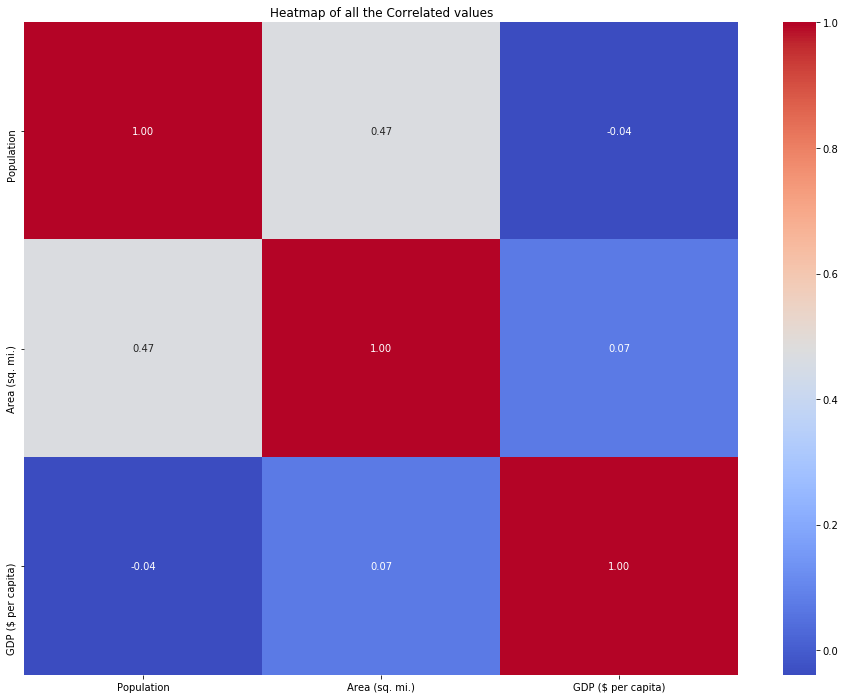

In [24]:
plt.figure(figsize=(16,12))
ax=plt.axes()
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm',ax=ax)
ax.set_title('Heatmap of all the Correlated values')
plt.show()

### Heatmap for Highly Correlated Values
As we can see from the Upper Heatmap, attributes such as Literacy, Phones per thousand and Service are highly positively correlated with GDP per capita whereas Infant Mortality Rate, Birthrate and Agriculture are highly negatively correlated with GDP per capita.
This means that if GDP per Capita would increase then likely Phones per thousand will also increase and vice versa.
And, if GDP per Capita would increase then likely the infant Mortality rate would go down and vice versa.

In [25]:
# choose attributes which shows relation
x = df[['GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Service','Infant mortality (per 1000 births)','Birthrate','Agriculture']]

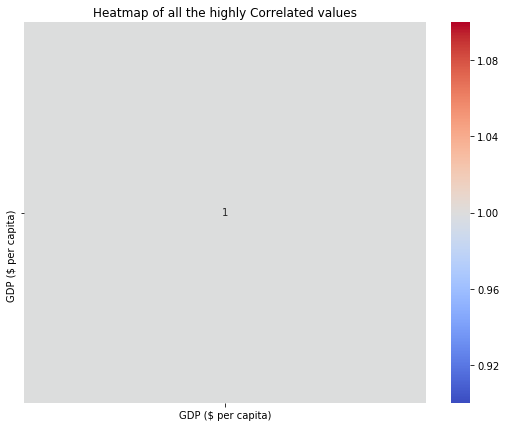

In [26]:
# show corr of the same
plt.figure(figsize=(9,7))
ax=plt.axes()
sns.heatmap(x.corr(), annot=True, cmap='coolwarm',ax=ax)
ax.set_title('Heatmap of all the highly Correlated values')
plt.show()

# <p style="text-align: center;">Linear Regression(Data Training and Modeling)<p>
[Reference Link 3](#3)
    
Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable (Factors), and the other is considered to be a dependent variable (GDP). Linear regression looks at various data points and plots a trend line. Linear regression can create a predictive model on apparently random data, showing trends in data. Linear regression looks at various data points and plots a trend line. Linear regression can create a predictive model on apparently random data, showing trends in data. 
#### RMSE
Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in forecasting and regression analysis to verify experimental results.

#### MSLE
The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors. MSLE stands for Mean Squared Log Error.

In [27]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


### Label Encoder
From the above dataset we can see that the Region has a value that is not numeric, so it is not possible to run Linear Regression Analysis on this data. So we use Label Encoder to transform this data of Region to a Region Label. This label will assign a numeric value to all the Region Entries.

In [28]:
LE = LabelEncoder()
df['Regional_label'] = LE.fit_transform(df['Region'])
df1 = df[['Region','Regional_label']]
df1.head(5)

,Region,Regional_label
0,ASIA (EX. NEAR EAST),0
1,EASTERN EUROPE,3
2,NORTHERN AFRICA,6
3,OCEANIA,8
4,WESTERN EUROPE,10


### Simple Linear Regression

Simple Linear Regression Analysis The simplest form of a regression analysis uses on dependent variable and one independent variable. In this simple model, a straight line approximates the relationship between the dependent variable and the independent variable.

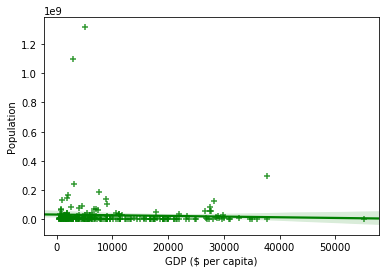

In [29]:
df[['Population','GDP ($ per capita)']]-df[['Population','GDP ($ per capita)']].mean()/df[['Population','GDP ($ per capita)']].std()
ax=sns.regplot(x='GDP ($ per capita)',y='Population',data=df,color='green',marker='+')

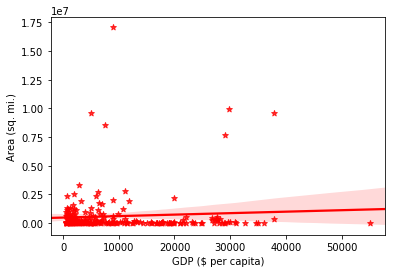

In [30]:
df[['Area (sq. mi.)','GDP ($ per capita)']]-df[['Area (sq. mi.)','GDP ($ per capita)']].mean()/df[['Area (sq. mi.)','GDP ($ per capita)']].std()
ax=sns.regplot(x='GDP ($ per capita)',y='Area (sq. mi.)',data=df,color='red',marker='*')

In [31]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = ['Phones (per 1000)']
target = 'GDP ($ per capita)'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

# <p style="text-align: center;">Total GDP<p>
    
GDP, which stands for Gross Domestic Product, is a measure describing the value of a country's economy. GDP takes into account all of the goods produced and services made available in a country over a specific period of time. Often, GDP is obtained quarterly and annually. GDP is a number that will ultimately indicate the overall economic health of the country.



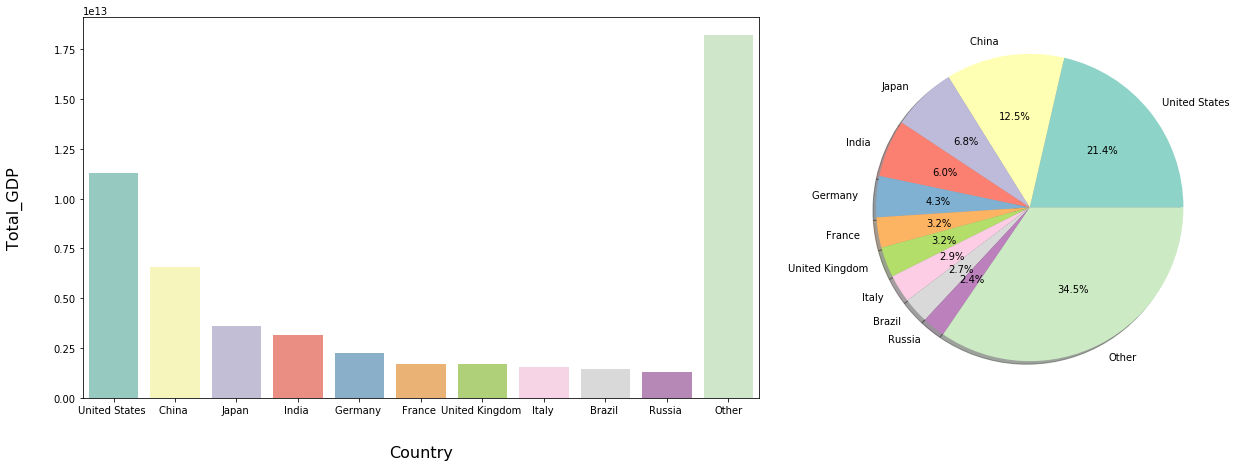

In [32]:
df['Total_GDP ($)'] = df['GDP ($ per capita)'] * df['Population']
#plt.figure(figsize=(16,6))
top_gdp_countries = df.sort_values('Total_GDP ($)',ascending=False).head(10)
other = pd.DataFrame({'Country':['Other'], 'Total_GDP ($)':[df['Total_GDP ($)'].sum() - top_gdp_countries['Total_GDP ($)'].sum()]})
gdps = pd.concat([top_gdp_countries[['Country','Total_GDP ($)']],other],ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7), gridspec_kw = {'width_ratios':[2,1]})
sns.barplot(x='Country', y='Total_GDP ($)', data=gdps, ax=axes[0], palette='Set3')
axes[0].set_xlabel('Country', labelpad=30, fontsize=16)
axes[0].set_ylabel('Total_GDP', labelpad=30, fontsize=16)

colors = sns.color_palette("Set3", gdps.shape[0]).as_hex()
axes[1].pie(gdps['Total_GDP ($)'], labels=gdps['Country'], colors=colors, autopct='%1.1f%%', shadow=True)
axes[1].axis('equal')
plt.show()

### Ranking of Countries according to the total GDP vs GDP per Capita

As we can see that countries like India and China which have low GDP per Capita because of their high population, jump up when it comes to calculating Total GDP.

In [33]:
Rank1 = df[['Country','Total_GDP ($)']].sort_values('Total_GDP ($)', ascending=False).reset_index()
Rank2 = df[['Country','GDP ($ per capita)']].sort_values('GDP ($ per capita)', ascending=False).reset_index()
Rank1 = pd.Series(Rank1.index.values+1, index=Rank1.Country)
Rank2 = pd.Series(Rank2.index.values+1, index=Rank2.Country)
Rank_change = (Rank2-Rank1).sort_values(ascending=False)
print('rank of total GDP - rank of GDP per capita:')
Rank_change.loc[top_gdp_countries.Country]

rank of total GDP - rank of GDP per capita:


Country
United States        2
China              119
Japan               14
India              146
Germany             15
France              15
United Kingdom      12
Italy               17
Brazil              83
Russia              75
dtype: int64

### Correlation of Total GDP with all the factors

In [34]:
df.corr()

,Population,Area (sq. mi.),GDP ($ per capita),Regional_label,Total_GDP ($)
Population,1.000000,0.469985,-0.039324,-0.211694,0.639435
Area (sq. mi.),0.469985,1.000000,0.072185,-0.083430,0.556312
GDP ($ per capita),-0.039324,0.072185,1.000000,0.188388,0.247632
Regional_label,-0.211694,-0.083430,0.188388,1.000000,-0.079671
Total_GDP ($),0.639435,0.556312,0.247632,-0.079671,1.000000


### Heatmap Representation of the same

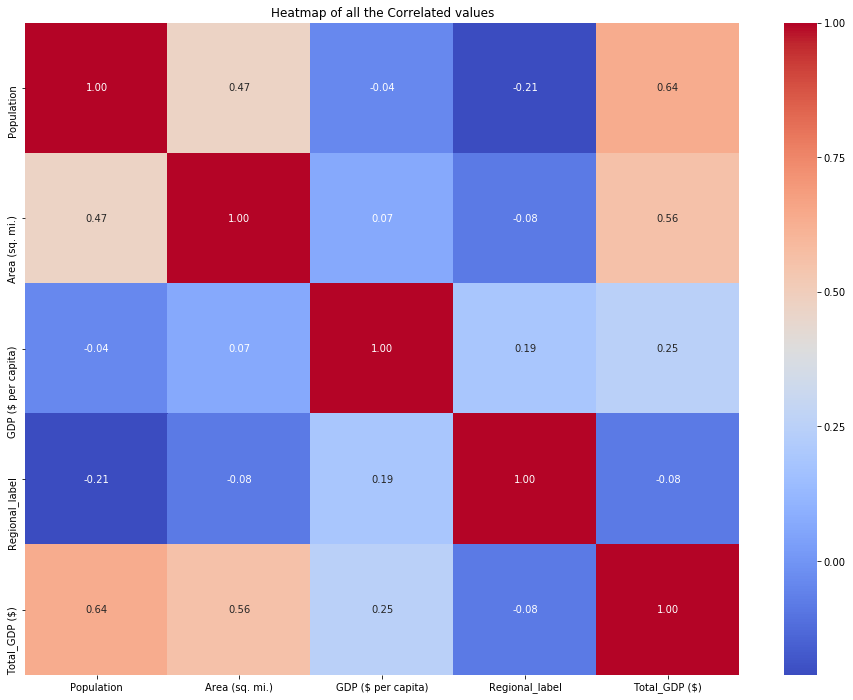

In [35]:
plt.figure(figsize=(16,12))
ax=plt.axes()
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm',ax=ax)
ax.set_title('Heatmap of all the Correlated values')
plt.show()

In [36]:
# choose attributes which shows relation
x = df[['Population','Area (sq. mi.)','GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Service','Infant mortality (per 1000 births)','Birthrate','Agriculture']]

### Heatmap of Highly correlated values of Total GDP and GDP per Capita

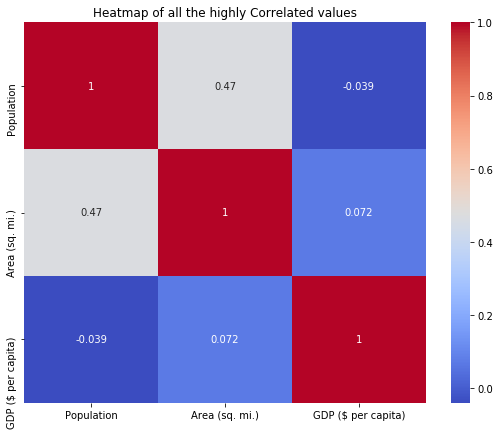

In [37]:
# show corr of the same
plt.figure(figsize=(9,7))
ax=plt.axes()
sns.heatmap(x.corr(), annot=True, cmap='coolwarm',ax=ax)
ax.set_title('Heatmap of all the highly Correlated values')
plt.show()

# <p style="text-align: center;">Citation<p>
1. https://github.com/nikbearbrown/INFO_6105/blob/master/Assignments/Countries_of_the_World_EDA_Assignment_1.ipynb - GitHub Account of Professor 
   <a id="1"></a>
2. https://www.kaggle.com/stieranka/predicting-gdp-world-countries - Kaggle Kernel on the same dataset
   <a id="2"></a>
3. https://www.youtube.com/watch?v=E5RjzSK0fvY&t=394s - Youtube video of Linear Regression
   <a id="3"></a>